In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Bivariate Normal Distribution
---

The joint p.d.f. of a bivariate normal distribution is

\begin{align*}
 f(x,y) &= 
 \frac1{2\pi\sigma_X\sigma_Y\sqrt{1-\rho^2}} \\
 &\quad\times\exp
 \left[-\frac1{2(1-\rho^2)}
 \left\{\frac{(x-\mu_X)^2}{\sigma_X^2}
 +\frac{(y-\mu_Y)^2}{\sigma_Y^2}
 \right.\right. \\
 &\qquad\qquad\qquad\qquad\qquad\qquad
 \left.\left.
 -\frac{2\rho(x-\mu_X)(y-\mu_Y)}{\sigma_X\sigma_Y}
 \right\}\right].
\end{align*}

The marginal distribution of $X$ is
$$
 X\sim\mathcal{N}(\mu_X,\sigma_X^2).
$$

The conditional distribution of $X$ given $Y=y$ is

$$
 X|Y=y \sim \mathcal{N}\left(\mu_X+\frac{\rho\sigma_X}{\sigma_Y}(y-\mu_y),
 \sigma_X^2(1-\rho^2)\right).
$$


In [2]:
covariance_matrix = np.array([[1.0, 0.8], [0.8, 1.0]])
xs = np.linspace(-3.0, 3.0, 101)
ys = np.linspace(-3.0, 3.0, 101)
x, y = np.meshgrid(xs, ys)
z = st.multivariate_normal.pdf(np.dstack((x, y)), cov=covariance_matrix)

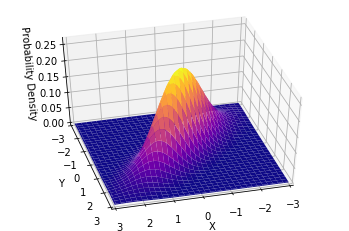

In [3]:
fig1 = plt.figure(num=1, facecolor='w')
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(x, y, z, cmap='plasma')
ax1.elev=45
ax1.azim=75
ax1.set_xlim((-3.0, 3.0))
ax1.set_ylim((-3.0, 3.0))
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Probability Density')
# plt.savefig('ms_fig_binormal_pdf.eps', dpi=600)
plt.show()

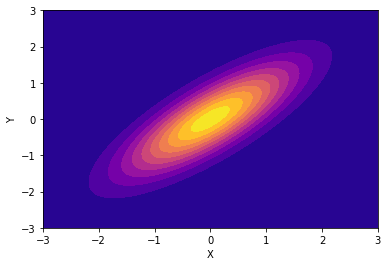

In [4]:
fig2 = plt.figure(num=2, facecolor='w')
plt.contourf(x, y, z, levels=10, cmap='plasma')
plt.xlabel('X')
plt.ylabel('Y')
# plt.savefig('ms_fig_binormal_contour.eps', dpi=600)
plt.show()

### Covariance, Correlation, and Independence
---

The <font color='red'>covariance</font> of two random variables $X$ and $Y$ is

$$
 \mathrm{Cov}[X,Y] = \mathrm{E}[(X-\mu_X)(Y-\mu_Y)],\ 
 \mu_X=\mathrm{E}[X],\ \mu_Y=\mathrm{E}[Y].
$$

The <font color='red'>correlation (coefficient)</font> of $X$ and $Y$ is

$$
 \rho_{XY} = \frac{\mathrm{Cov}[X,Y]}{\sigma_X\sigma_Y},\quad 
 \sigma_X^2=\mathrm{Var}[X],\quad \sigma_Y^2=\mathrm{Var}[Y].
$$

$X$ and $Y$ are <font color='red'>mutually independent</font> if and only if

$$
 f(x,y) = f_X(x)f_Y(y),\ \Leftrightarrow \ f_X(x|y)=f_X(x),\ \Leftrightarrow \ f_Y(y|x)=f_Y(y).
$$

In [5]:
np.random.seed(99)
X1 = st.multivariate_normal.rvs(mean=np.zeros(2), 
                                cov=np.array([[1.0, 0.9], [0.9, 1.0]]), 
                                size=250)
X2 = st.multivariate_normal.rvs(mean=np.zeros(2), 
                                cov=np.array([[1.0, -0.9], [-0.9, 1.0]]), 
                                size=250)
X3 = st.multivariate_normal.rvs(mean=np.zeros(2), 
                                cov=np.array([[1.0, 0.0], [0.0, 1.0]]), 
                                size=250)
U = st.uniform.rvs(loc=0.0, scale=2.0*np.pi, size=250)
X = 2.0 * np.cos(U)
Y = 2.0 * np.sin(U)

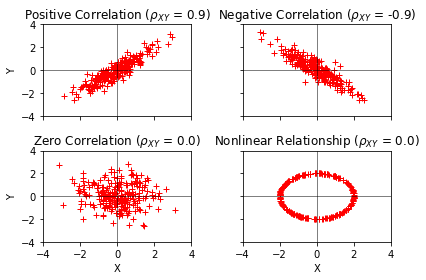

In [6]:
fig, ax = plt.subplots(2, 2, sharex='all', sharey='all', num=1, facecolor='w')
ax[0,0].plot(X1[:,0], X1[:,1], 'r+')
ax[0,0].axhline(color='k', linewidth=0.5)
ax[0,0].axvline(color='k', linewidth=0.5)
ax[0,0].set_xlim((-4.0, 4.0))
ax[0,0].set_ylim((-4.0, 4.0))
ax[0,0].set_ylabel('Y')
ax[0,0].set_title('Positive Correlation ($\\rho_{XY}$ = 0.9)')
ax[0,1].plot(X2[:,0], X2[:,1], 'r+')
ax[0,1].axhline(color='k', linewidth=0.5)
ax[0,1].axvline(color='k', linewidth=0.5)
ax[0,1].set_title('Negative Correlation ($\\rho_{XY}$ = -0.9)')
ax[1,0].plot(X3[:,0], X3[:,1], 'r+')
ax[1,0].axhline(color='k', linewidth=0.5)
ax[1,0].axvline(color='k', linewidth=0.5)
ax[1,0].set_xlabel('X')
ax[1,0].set_ylabel('Y')
ax[1,0].set_title('Zero Correlation ($\\rho_{XY}$ = 0.0)')
ax[1,1].plot(X, Y, 'r+')
ax[1,1].axhline(color='k', linewidth=0.5)
ax[1,1].axvline(color='k', linewidth=0.5)
ax[1,1].set_xlabel('X')
ax[1,1].set_title('Nonlinear Relationship ($\\rho_{XY}$ = 0.0)')
plt.tight_layout()
# plt.savefig('ms_fig_correlation.eps', dpi=600)
plt.show()